In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

/Applications/ucsd/dsc/algorithmicTradingProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
Apple = yf.download('AAPL', start = "2010-01-01", end = "2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
Apple

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.458558,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.386255,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,129.047516,131.970001,133.460007,131.100006,131.320007,54930100
2020-12-28 00:00:00+00:00,133.662994,136.690002,137.339996,133.509995,133.990005,124486200


In [4]:
ticker = ["SPY", "AAPL", "KO"]

In [5]:
stocks = yf.download(ticker, start = "2010-01-01", end = "2021-01-01")

[*********************100%***********************]  3 of 3 completed


In [6]:
stocks

Price                       Adj Close                              Close  \
Ticker                           AAPL         KO         SPY        AAPL   
Date                                                                       
2010-01-04 00:00:00+00:00    6.447411  17.949808   86.026451    7.643214   
2010-01-05 00:00:00+00:00    6.458558  17.732664   86.254143    7.656429   
2010-01-06 00:00:00+00:00    6.355826  17.726376   86.314903    7.534643   
2010-01-07 00:00:00+00:00    6.344078  17.682314   86.679260    7.520714   
2010-01-08 00:00:00+00:00    6.386255  17.355045   86.967712    7.570714   
...                               ...        ...         ...         ...   
2020-12-24 00:00:00+00:00  129.047516  47.333469  348.497772  131.970001   
2020-12-28 00:00:00+00:00  133.662994  47.971191  351.491547  136.690002   
2020-12-29 00:00:00+00:00  131.883301  47.944622  350.821045  134.869995   
2020-12-30 00:00:00+00:00  130.758759  48.219196  351.321533  133.720001   
2020-12-31 00:00:00+00:00  129.751602  48.573494  353.106598  132.690002   

Price                                                   High             \
Ticker                            KO         SPY        AAPL         KO   
Date                                                                      
2010-01-04 00:00:00+00:00  28.520000  113.330002    7.660714  28.610001   
2010-01-05 00:00:00+00:00  28.174999  113.629997    7.699643  28.495001   
2010-01-06 00:00:00+00:00  28.165001  113.709999    7.686786  28.219999   
2010-01-07 00:00:00+00:00  28.094999  114.190002    7.571429  28.184999   
2010-01-08 00:00:00+00:00  27.575001  114.570000    7.571429  27.820000   
...                              ...         ...         ...        ...   
2020-12-24 00:00:00+00:00  53.439999  369.000000  133.460007  53.549999   
2020-12-28 00:00:00+00:00  54.160000  372.170013  137.339996  54.439999   
2020-12-29 00:00:00+00:00  54.130001  371.459991  138.789993  54.490002   
2020-12-30 00:00:00+00:00  54.439999  371.989990  135.990005  54.630001   
2020-12-31 00:00:00+00:00  54.840000  373.880005  134.740005  54.930000   

Price                                         Low                         \
Ticker                            SPY        AAPL         KO         SPY   
Date                                                                       
2010-01-04 00:00:00+00:00  113.389999    7.585000  28.450001  111.510002   
2010-01-05 00:00:00+00:00  113.680000    7.616071  28.070000  112.849998   
2010-01-06 00:00:00+00:00  113.989998    7.526786  27.990000  113.430000   
2010-01-07 00:00:00+00:00  114.330002    7.466071  27.875000  113.180000   
2010-01-08 00:00:00+00:00  114.620003    7.466429  27.375000  113.660004   
...                               ...         ...        ...         ...   
2020-12-24 00:00:00+00:00  369.029999  131.100006  53.020000  367.450012   
2020-12-28 00:00:00+00:00  372.589996  133.509995  53.730000  371.070007   
2020-12-29 00:00:00+00:00  374.000000  134.339996  54.020000  370.829987   
2020-12-30 00:00:00+00:00  373.100006  133.399994  54.029999  371.570007   
2020-12-31 00:00:00+00:00  374.660004  131.720001  54.270000  371.230011   

Price                            Open                            Volume  \
Ticker                           AAPL         KO         SPY       AAPL   
Date                                                                      
2010-01-04 00:00:00+00:00    7.622500  28.580000  112.370003  493729600   
2010-01-05 00:00:00+00:00    7.664286  28.424999  113.260002  601904800   
2010-01-06 00:00:00+00:00    7.656429  28.174999  113.519997  552160000   
2010-01-07 00:00:00+00:00    7.562500  28.165001  113.500000  477131200   
2010-01-08 00:00:00+00:00    7.510714  27.730000  113.889999  447610800   
...                               ...        ...         ...        ...   
2020-12-24 00:00:00+00:00  131.320007  53.020000  368.079987   54930100   
2020-12-28 00:00:00+00:00  133.990005  53.849998  371.739990  1244862

In [7]:
stocks.head()

Price                     Adj Close                           Close  \
Ticker                         AAPL         KO        SPY      AAPL   
Date                                                                  
2010-01-04 00:00:00+00:00  6.447411  17.949808  86.026451  7.643214   
2010-01-05 00:00:00+00:00  6.458558  17.732664  86.254143  7.656429   
2010-01-06 00:00:00+00:00  6.355826  17.726376  86.314903  7.534643   
2010-01-07 00:00:00+00:00  6.344078  17.682314  86.679260  7.520714   
2010-01-08 00:00:00+00:00  6.386255  17.355045  86.967712  7.570714   

Price                                                 High             \
Ticker                            KO         SPY      AAPL         KO   
Date                                                                    
2010-01-04 00:00:00+00:00  28.520000  113.330002  7.660714  28.610001   
2010-01-05 00:00:00+00:00  28.174999  113.629997  7.699643  28.495001   
2010-01-06 00:00:00+00:00  28.165001  113.709999  7.686786  28.219999   
2010-01-07 00:00:00+00:00  28.094999  114.190002  7.571429  28.184999   
2010-01-08 00:00:00+00:00  27.575001  114.570000  7.571429  27.820000   

Price                                       Low                         \
Ticker                            SPY      AAPL         KO         SPY   
Date                                                                     
2010-01-04 00:00:00+00:00  113.389999  7.585000  28.450001  111.510002   
2010-01-05 00:00:00+00:00  113.680000  7.616071  28.070000  112.849998   
2010-01-06 00:00:00+00:00  113.989998  7.526786  27.990000  113.430000   
2010-01-07 00:00:00+00:00  114.330002  7.466071  27.875000  113.180000   
2010-01-08 00:00:00+00:00  114.620003  7.466429  27.375000  113.660004   

Price                          Open                            Volume  \
Ticker                         AAPL         KO         SPY       AAPL   
Date                                                                    
2010-01-04 00:00:00+00:00  7.622500  28.580000  112.370003  493729600   
2010-01-05 00:00:00+00:00  7.664286  28.424999  113.260002  601904800   
2010-01-06 00:00:00+00:00  7.656429  28.174999  113.519997  552160000   
2010-01-07 00:00:00+00:00  7.562500  28.165001  113.500000  477131200   
2010-01-08 00:00:00+00:00  7.510714  27.730000  113.889999  447610800   

Price                                           
Ticker                           KO        SPY  
Date                                            
2010-01-04 00:00:00+00:00  13870400  118944600  
2010-01-05 00:00:00+00:00  23172400  111579900  
2010-01-06 00:00:00+00:00  19264600  116074400  
2010-01-07 00:00:00+00:00  13234600  131091100  
2010-01-08 00:00:00+00:00  28712400  126402800

In [8]:
stocks.tail()

Price                       Adj Close                              Close  \
Ticker                           AAPL         KO         SPY        AAPL   
Date                                                                       
2020-12-24 00:00:00+00:00  129.047516  47.333469  348.497772  131.970001   
2020-12-28 00:00:00+00:00  133.662994  47.971191  351.491547  136.690002   
2020-12-29 00:00:00+00:00  131.883301  47.944622  350.821045  134.869995   
2020-12-30 00:00:00+00:00  130.758759  48.219196  351.321533  133.720001   
2020-12-31 00:00:00+00:00  129.751602  48.573494  353.106598  132.690002   

Price                                                   High             \
Ticker                            KO         SPY        AAPL         KO   
Date                                                                      
2020-12-24 00:00:00+00:00  53.439999  369.000000  133.460007  53.549999   
2020-12-28 00:00:00+00:00  54.160000  372.170013  137.339996  54.439999   
2020-12-29 00:00:00+00:00  54.130001  371.459991  138.789993  54.490002   
2020-12-30 00:00:00+00:00  54.439999  371.989990  135.990005  54.630001   
2020-12-31 00:00:00+00:00  54.840000  373.880005  134.740005  54.930000   

Price                                         Low                         \
Ticker                            SPY        AAPL         KO         SPY   
Date                                                                       
2020-12-24 00:00:00+00:00  369.029999  131.100006  53.020000  367.450012   
2020-12-28 00:00:00+00:00  372.589996  133.509995  53.730000  371.070007   
2020-12-29 00:00:00+00:00  374.000000  134.339996  54.020000  370.829987   
2020-12-30 00:00:00+00:00  373.100006  133.399994  54.029999  371.570007   
2020-12-31 00:00:00+00:00  374.660004  131.720001  54.270000  371.230011   

Price                            Open                            Volume  \
Ticker                           AAPL         KO         SPY       AAPL   
Date                                                                      
2020-12-24 00:00:00+00:00  131.320007  53.020000  368.079987   54930100   
2020-12-28 00:00:00+00:00  133.990005  53.849998  371.739990  124486200   
2020-12-29 00:00:00+00:00  138.050003  54.450001  373.809998  121047300   
2020-12-30 00:00:00+00:00  135.580002  54.049999  372.339996   96452100   
2020-12-31 00:00:00+00:00  134.080002  54.450001  371.779999   99116600   

Price                                         
Ticker                          KO       SPY  
Date                                          
2020-12-24 00:00:00+00:00  3265500  26457900  
2020-12-28 00:00:00+00:00  9020500  39000400  
2020-12-29 00:00:00+00:00  8320600  53680500  
2020-12-30 00:00:00+00:00  8142700  49455300  
2020-12-31 00:00:00+00:00  8495000  78520700

In [9]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 00:00:00+00:00 to 2020-12-31 00:00:00+00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2769 non-null   float64
 1   (Adj Close, KO)    2769 non-null   float64
 2   (Adj Close, SPY)   2769 non-null   float64
 3   (Close, AAPL)      2769 non-null   float64
 4   (Close, KO)        2769 non-null   float64
 5   (Close, SPY)       2769 non-null   float64
 6   (High, AAPL)       2769 non-null   float64
 7   (High, KO)         2769 non-null   float64
 8   (High, SPY)        2769 non-null   float64
 9   (Low, AAPL)        2769 non-null   float64
 10  (Low, KO)          2769 non-null   float64
 11  (Low, SPY)         2769 non-null   float64
 12  (Open, AAPL)       2769 non-null   float64
 13  (Open, KO)         2769 non-null   float64
 14  (Open, SPY)        2769 non-null   float64
 15  (Volume, AAPL)     2769 

In [10]:
stocks.to_csv('stocks_data.csv')

In [11]:
stocks = pd.read_csv('stocks_data.csv', header = [0,1],index_col = [0], parse_dates = [0])

In [12]:
stocks

Price                       Adj Close                              Close  \
Ticker                           AAPL         KO         SPY        AAPL   
Date                                                                       
2010-01-04 00:00:00+00:00    6.447411  17.949808   86.026451    7.643214   
2010-01-05 00:00:00+00:00    6.458558  17.732664   86.254143    7.656429   
2010-01-06 00:00:00+00:00    6.355826  17.726376   86.314903    7.534643   
2010-01-07 00:00:00+00:00    6.344078  17.682314   86.679260    7.520714   
2010-01-08 00:00:00+00:00    6.386255  17.355045   86.967712    7.570714   
...                               ...        ...         ...         ...   
2020-12-24 00:00:00+00:00  129.047516  47.333469  348.497772  131.970001   
2020-12-28 00:00:00+00:00  133.662994  47.971191  351.491547  136.690002   
2020-12-29 00:00:00+00:00  131.883301  47.944622  350.821045  134.869995   
2020-12-30 00:00:00+00:00  130.758759  48.219196  351.321533  133.720001   
2020-12-31 00:00:00+00:00  129.751602  48.573494  353.106598  132.690002   

Price                                                   High             \
Ticker                            KO         SPY        AAPL         KO   
Date                                                                      
2010-01-04 00:00:00+00:00  28.520000  113.330002    7.660714  28.610001   
2010-01-05 00:00:00+00:00  28.174999  113.629997    7.699643  28.495001   
2010-01-06 00:00:00+00:00  28.165001  113.709999    7.686786  28.219999   
2010-01-07 00:00:00+00:00  28.094999  114.190002    7.571429  28.184999   
2010-01-08 00:00:00+00:00  27.575001  114.570000    7.571429  27.820000   
...                              ...         ...         ...        ...   
2020-12-24 00:00:00+00:00  53.439999  369.000000  133.460007  53.549999   
2020-12-28 00:00:00+00:00  54.160000  372.170013  137.339996  54.439999   
2020-12-29 00:00:00+00:00  54.130001  371.459991  138.789993  54.490002   
2020-12-30 00:00:00+00:00  54.439999  371.989990  135.990005  54.630001   
2020-12-31 00:00:00+00:00  54.840000  373.880005  134.740005  54.930000   

Price                                         Low                         \
Ticker                            SPY        AAPL         KO         SPY   
Date                                                                       
2010-01-04 00:00:00+00:00  113.389999    7.585000  28.450001  111.510002   
2010-01-05 00:00:00+00:00  113.680000    7.616071  28.070000  112.849998   
2010-01-06 00:00:00+00:00  113.989998    7.526786  27.990000  113.430000   
2010-01-07 00:00:00+00:00  114.330002    7.466071  27.875000  113.180000   
2010-01-08 00:00:00+00:00  114.620003    7.466429  27.375000  113.660004   
...                               ...         ...        ...         ...   
2020-12-24 00:00:00+00:00  369.029999  131.100006  53.020000  367.450012   
2020-12-28 00:00:00+00:00  372.589996  133.509995  53.730000  371.070007   
2020-12-29 00:00:00+00:00  374.000000  134.339996  54.020000  370.829987   
2020-12-30 00:00:00+00:00  373.100006  133.399994  54.029999  371.570007   
2020-12-31 00:00:00+00:00  374.660004  131.720001  54.270000  371.230011   

Price                            Open                            Volume  \
Ticker                           AAPL         KO         SPY       AAPL   
Date                                                                      
2010-01-04 00:00:00+00:00    7.622500  28.580000  112.370003  493729600   
2010-01-05 00:00:00+00:00    7.664286  28.424999  113.260002  601904800   
2010-01-06 00:00:00+00:00    7.656429  28.174999  113.519997  552160000   
2010-01-07 00:00:00+00:00    7.562500  28.165001  113.500000  477131200   
2010-01-08 00:00:00+00:00    7.510714  27.730000  113.889999  447610800   
...                               ...        ...         ...        ...   
2020-12-24 00:00:00+00:00  131.320007  53.020000  368.079987   54930100   
2020-12-28 00:00:00+00:00  133.990005  53.849998  371.739990  1244862

In [13]:
#convert multi index to one tuple
stocks.columns = stocks.columns.to_flat_index()

In [14]:
stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'KO'),  ('Adj Close', 'SPY'),
           ('Close', 'AAPL'),       ('Close', 'KO'),      ('Close', 'SPY'),
            ('High', 'AAPL'),        ('High', 'KO'),       ('High', 'SPY'),
             ('Low', 'AAPL'),         ('Low', 'KO'),        ('Low', 'SPY'),
            ('Open', 'AAPL'),        ('Open', 'KO'),       ('Open', 'SPY'),
          ('Volume', 'AAPL'),      ('Volume', 'KO'),     ('Volume', 'SPY')],
      dtype='object')

In [15]:
stocks

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,6.447411,17.949808,86.026451,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05 00:00:00+00:00,6.458558,17.732664,86.254143,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06 00:00:00+00:00,6.355826,17.726376,86.314903,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400
2010-01-07 00:00:00+00:00,6.344078,17.682314,86.679260,7.520714,28.094999,114.190002,7.571429,28.184999,114.330002,7.466071,27.875000,113.180000,7.562500,28.165001,113.500000,477131200,13234600,131091100
2010-01-08 00:00:00+00:00,6.386255,17.355045,86.967712,7.570714,27.575001,114.570000,7.571429,27.820000,114.620003,7.466429,27.375000,113.660004,7.510714,27.730000,113.889999,447610800,28712400,126402800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,129.047516,47.333469,348.497772,131.970001,53.439999,369.000000,133.460007,53.549999,369.029999,131.100006,53.020000,367.450012,131.320007,53.020000,368.079987,54930100,3265500,26457900
2020-12-28 00:00:00+00:00,133.662994,47.971191,351.491547,136.690002,54.160000,372.170013,137.339996,54.439999,372.589996,133.509995,53.730000,371.070007,133.990005,53.849998,371.739990,124486200,9020500,39000400
2020-12-29 00:00:00+00:00,131.883301,47.944622,350.821045,134.869995,54.130001,371.459991,138.789993,54.490002,374.000000,134.339996,54.020000,370.829987,138.050003,54.450001,373.809998,121047300,8320600,53680500


In [16]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

In [17]:
stocks

Adj Close                              Close  \
                                 AAPL         KO         SPY        AAPL   
Date                                                                       
2010-01-04 00:00:00+00:00    6.447411  17.949808   86.026451    7.643214   
2010-01-05 00:00:00+00:00    6.458558  17.732664   86.254143    7.656429   
2010-01-06 00:00:00+00:00    6.355826  17.726376   86.314903    7.534643   
2010-01-07 00:00:00+00:00    6.344078  17.682314   86.679260    7.520714   
2010-01-08 00:00:00+00:00    6.386255  17.355045   86.967712    7.570714   
...                               ...        ...         ...         ...   
2020-12-24 00:00:00+00:00  129.047516  47.333469  348.497772  131.970001   
2020-12-28 00:00:00+00:00  133.662994  47.971191  351.491547  136.690002   
2020-12-29 00:00:00+00:00  131.883301  47.944622  350.821045  134.869995   
2020-12-30 00:00:00+00:00  130.758759  48.219196  351.321533  133.720001   
2020-12-31 00:00:00+00:00  129.751602  48.573494  353.106598  132.690002   

                                                        High             \
                                  KO         SPY        AAPL         KO   
Date                                                                      
2010-01-04 00:00:00+00:00  28.520000  113.330002    7.660714  28.610001   
2010-01-05 00:00:00+00:00  28.174999  113.629997    7.699643  28.495001   
2010-01-06 00:00:00+00:00  28.165001  113.709999    7.686786  28.219999   
2010-01-07 00:00:00+00:00  28.094999  114.190002    7.571429  28.184999   
2010-01-08 00:00:00+00:00  27.575001  114.570000    7.571429  27.820000   
...                              ...         ...         ...        ...   
2020-12-24 00:00:00+00:00  53.439999  369.000000  133.460007  53.549999   
2020-12-28 00:00:00+00:00  54.160000  372.170013  137.339996  54.439999   
2020-12-29 00:00:00+00:00  54.130001  371.459991  138.789993  54.490002   
2020-12-30 00:00:00+00:00  54.439999  371.989990  135.990005  54.630001   
2020-12-31 00:00:00+00:00  54.840000  373.880005  134.740005  54.930000   

                                              Low                         \
                                  SPY        AAPL         KO         SPY   
Date                                                                       
2010-01-04 00:00:00+00:00  113.389999    7.585000  28.450001  111.510002   
2010-01-05 00:00:00+00:00  113.680000    7.616071  28.070000  112.849998   
2010-01-06 00:00:00+00:00  113.989998    7.526786  27.990000  113.430000   
2010-01-07 00:00:00+00:00  114.330002    7.466071  27.875000  113.180000   
2010-01-08 00:00:00+00:00  114.620003    7.466429  27.375000  113.660004   
...                               ...         ...        ...         ...   
2020-12-24 00:00:00+00:00  369.029999  131.100006  53.020000  367.450012   
2020-12-28 00:00:00+00:00  372.589996  133.509995  53.730000  371.070007   
2020-12-29 00:00:00+00:00  374.000000  134.339996  54.020000  370.829987   
2020-12-30 00:00:00+00:00  373.100006  133.399994  54.029999  371.570007   
2020-12-31 00:00:00+00:00  374.660004  131.720001  54.270000  371.230011   

                                 Open                            Volume  \
                                 AAPL         KO         SPY       AAPL   
Date                                                                      
2010-01-04 00:00:00+00:00    7.622500  28.580000  112.370003  493729600   
2010-01-05 00:00:00+00:00    7.664286  28.424999  113.260002  601904800   
2010-01-06 00:00:00+00:00    7.656429  28.174999  113.519997  552160000   
2010-01-07 00:00:00+00:00    7.562500  28.165001  113.500000  477131200   
2010-01-08 00:00:00+00:00    7.510714  27.730000  113.889999  447610800   
...                               ...        ...         ...        ...   
2020-12-24 00:00:00+00:00  131.320007  53.020000  368.079987   54930100   
2020-12-28 00:00:00+00:00  133.990005  53.849998  371.739990  124486200   
2020-12-29 00:00:00+00

In [18]:
stocks.describe()

Adj Close                                  Close               \
              AAPL           KO          SPY         AAPL           KO   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean     31.408694    31.254204   179.746702    33.777537    41.320121   
std      24.494792     7.941187    68.820790    24.572747     6.808527   
min       5.785831    15.888555    78.267967     6.858929    25.014999   
25%      15.127214    25.817049   113.426331    17.484285    37.660000   
50%      24.429564    30.827394   173.752274    26.987499    41.759998   
75%      40.732090    36.513336   238.868698    43.007500    45.549999   
max     133.662994    51.496750   353.106598   136.690002    60.130001   

                           High                                    Low  \
               SPY         AAPL           KO          SPY         AAPL   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean    207.676797    34.114230    41.583236   208.716963    33.413543   
std      67.240791    24.895185     6.864731    67.589965    24.220789   
min     102.199997     7.000000    25.150000   103.419998     6.794643   
25%     141.559998    17.695356    37.919998   142.100006    17.333929   
50%     205.210007    27.225000    41.980000   206.190002    26.705000   
75%     265.339996    43.367500    45.799999   267.320007    42.605000   
max     373.880005   138.789993    60.130001   378.459991   134.339996   

                                        Open                            \
                KO          SPY         AAPL           KO          SPY   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean     41.042551   206.475522    33.764375    41.314411   207.648136   
std       6.755616    66.883703    24.561595     6.807492    67.258092   
min      24.735001   101.129997     6.870357    25.110001   103.110001   
25%      37.419998   140.929993    17.518213    37.700001   141.660004   
50%      41.529999   204.110001    26.975000    41.750000   204.960007   
75%      45.310001   263.390015    43.012501    45.549999   265.779999   
max      59.619999   371.570007   138.050003    59.810001   373.809998   

             Volume                              
               AAPL            KO           SPY  
count  2.769000e+03  2.769000e+03  2.769000e+03  
mean   2.866162e+08  1.502133e+07  1.244573e+08  
std    2.289459e+08  6.716946e+06  7.477756e+07  
min    4.544800e+07  2.996300e+06  2.027000e+07  
25%    1.211120e+08  1.071810e+07  7.292670e+07  
50%    2.029972e+08  1.350830e+07  1.045961e+08  
75%    3.890376e+08  1.751480e+07  1.539926e+08  
max    1.880998e+09  9.896750e+07  7.178287e+08

In [19]:
close = stocks.loc[:,"Close"].copy()

In [20]:
close

,AAPL,KO,SPY
Date,,,
2010-01-04 00:00:00+00:00,7.643214,28.520000,113.330002
2010-01-05 00:00:00+00:00,7.656429,28.174999,113.629997
2010-01-06 00:00:00+00:00,7.534643,28.165001,113.709999
2010-01-07 00:00:00+00:00,7.520714,28.094999,114.190002
2010-01-08 00:00:00+00:00,7.570714,27.575001,114.570000
...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,53.439999,369.000000
2020-12-28 00:00:00+00:00,136.690002,54.160000,372.170013
2020-12-29 00:00:00+00:00,134.869995,54.130001,371.459991


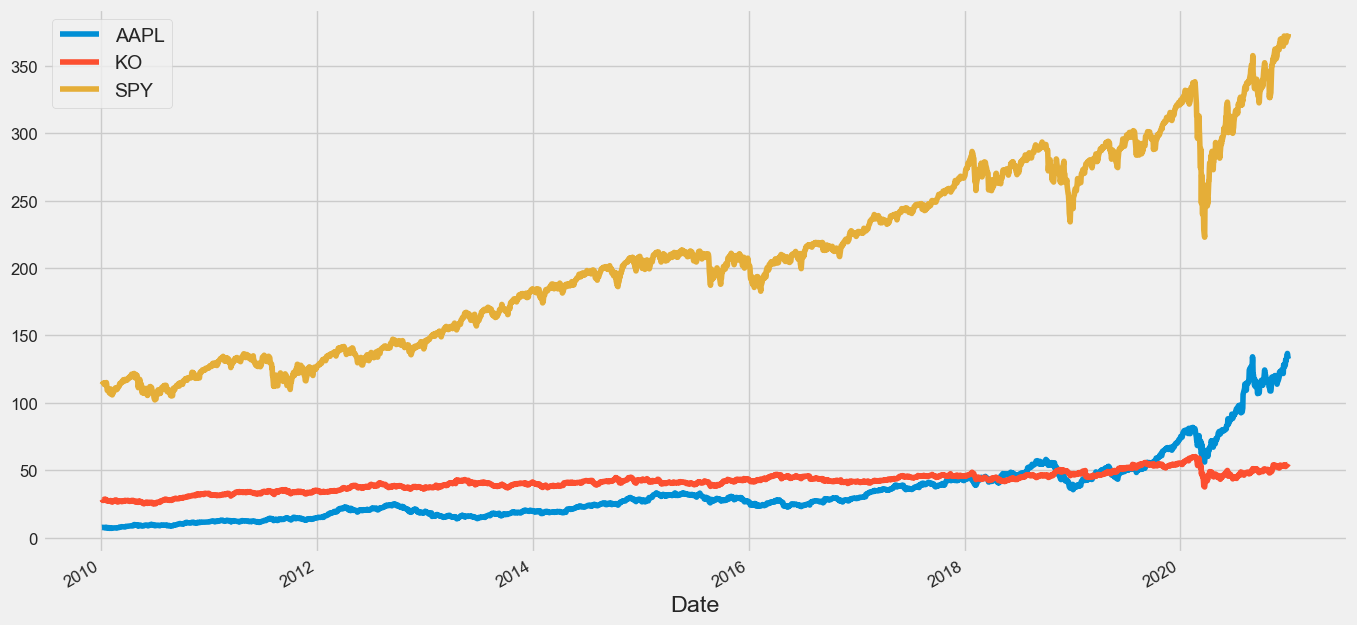

In [21]:
%matplotlib inline
plt.style.use('fivethirtyeight')

close.plot(figsize=(15,8), fontsize = 12)
plt.legend()
plt.show()

### Normalizing

In [22]:
close.iloc[0,0]

np.float64(7.643214225769043)

In [23]:
close.AAPL

Date
2010-01-04 00:00:00+00:00      7.643214
2010-01-05 00:00:00+00:00      7.656429
2010-01-06 00:00:00+00:00      7.534643
2010-01-07 00:00:00+00:00      7.520714
2010-01-08 00:00:00+00:00      7.570714
                                ...    
2020-12-24 00:00:00+00:00    131.970001
2020-12-28 00:00:00+00:00    136.690002
2020-12-29 00:00:00+00:00    134.869995
2020-12-30 00:00:00+00:00    133.720001
2020-12-31 00:00:00+00:00    132.690002
Name: AAPL, Length: 2769, dtype: float64

In [24]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2010-01-04 00:00:00+00:00     100.000000
2010-01-05 00:00:00+00:00     100.172893
2010-01-06 00:00:00+00:00      98.579511
2010-01-07 00:00:00+00:00      98.397266
2010-01-08 00:00:00+00:00      99.051443
                                ...     
2020-12-24 00:00:00+00:00    1726.629626
2020-12-28 00:00:00+00:00    1788.383766
2020-12-29 00:00:00+00:00    1764.571699
2020-12-30 00:00:00+00:00    1749.525753
2020-12-31 00:00:00+00:00    1736.049763
Name: AAPL, Length: 2769, dtype: float64

In [25]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2010-01-04 00:00:00+00:00     100.000000
2010-01-05 00:00:00+00:00     100.172893
2010-01-06 00:00:00+00:00      98.579511
2010-01-07 00:00:00+00:00      98.397266
2010-01-08 00:00:00+00:00      99.051443
                                ...     
2020-12-24 00:00:00+00:00    1726.629626
2020-12-28 00:00:00+00:00    1788.383766
2020-12-29 00:00:00+00:00    1764.571699
2020-12-30 00:00:00+00:00    1749.525753
2020-12-31 00:00:00+00:00    1736.049763
Name: AAPL, Length: 2769, dtype: float64

In [26]:
close.iloc[0]

AAPL      7.643214
KO       28.520000
SPY     113.330002
Name: 2010-01-04 00:00:00+00:00, dtype: float64

In [27]:
normclose = close.div(close.iloc[0]).mul(100)

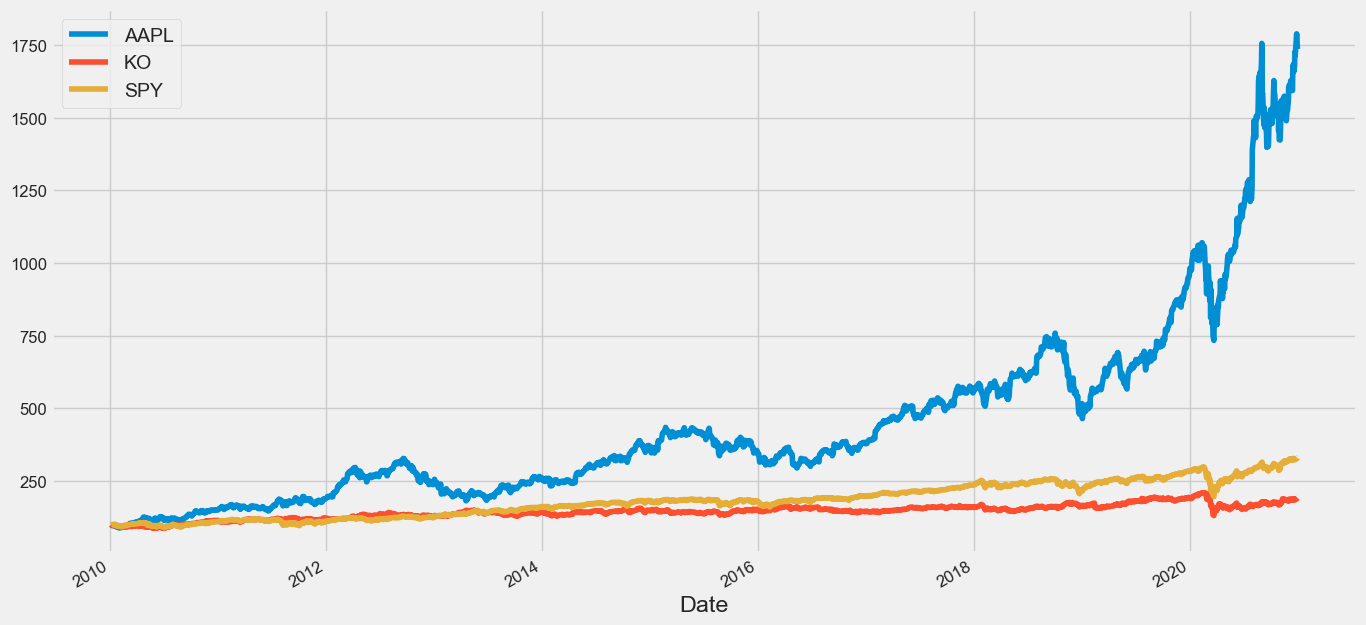

In [28]:
normclose.plot(figsize=(15,8), fontsize = 12)
plt.legend()
plt.show()

In [29]:
aapl = close.AAPL.copy().to_frame()

In [30]:
aapl

,AAPL
Date,
2010-01-04 00:00:00+00:00,7.643214
2010-01-05 00:00:00+00:00,7.656429
2010-01-06 00:00:00+00:00,7.534643
2010-01-07 00:00:00+00:00,7.520714
2010-01-08 00:00:00+00:00,7.570714
...,...
2020-12-24 00:00:00+00:00,131.970001
2020-12-28 00:00:00+00:00,136.690002
2020-12-29 00:00:00+00:00,134.869995


In [31]:
aapl.shift(periods=1)

,AAPL
Date,
2010-01-04 00:00:00+00:00,NaN
2010-01-05 00:00:00+00:00,7.643214
2010-01-06 00:00:00+00:00,7.656429
2010-01-07 00:00:00+00:00,7.534643
2010-01-08 00:00:00+00:00,7.520714
...,...
2020-12-24 00:00:00+00:00,130.960007
2020-12-28 00:00:00+00:00,131.970001
2020-12-29 00:00:00+00:00,136.690002


In [32]:
aapl["lag1"] = aapl.shift(periods=1)

In [33]:
aapl

,AAPL,lag1
Date,,
2010-01-04 00:00:00+00:00,7.643214,NaN
2010-01-05 00:00:00+00:00,7.656429,7.643214
2010-01-06 00:00:00+00:00,7.534643,7.656429
2010-01-07 00:00:00+00:00,7.520714,7.534643
2010-01-08 00:00:00+00:00,7.570714,7.520714
...,...,...
2020-12-24 00:00:00+00:00,131.970001,130.960007
2020-12-28 00:00:00+00:00,136.690002,131.970001
2020-12-29 00:00:00+00:00,134.869995,136.690002


In [34]:
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [35]:
aapl

,AAPL,lag1,Diff
Date,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN
2010-01-05 00:00:00+00:00,7.656429,7.643214,0.013215
2010-01-06 00:00:00+00:00,7.534643,7.656429,-0.121786
2010-01-07 00:00:00+00:00,7.520714,7.534643,-0.013929
2010-01-08 00:00:00+00:00,7.570714,7.520714,0.050000
...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,130.960007,1.009995
2020-12-28 00:00:00+00:00,136.690002,131.970001,4.720001
2020-12-29 00:00:00+00:00,134.869995,136.690002,-1.820007


In [36]:
aapl["% Change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [37]:
aapl

,AAPL,lag1,Diff,% Change
Date,,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,7.656429,7.643214,0.013215,0.172893
2010-01-06 00:00:00+00:00,7.534643,7.656429,-0.121786,-1.590632
2010-01-07 00:00:00+00:00,7.520714,7.534643,-0.013929,-0.184871
2010-01-08 00:00:00+00:00,7.570714,7.520714,0.050000,0.664833
...,...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,130.960007,1.009995,0.771224
2020-12-28 00:00:00+00:00,136.690002,131.970001,4.720001,3.576571
2020-12-29 00:00:00+00:00,134.869995,136.690002,-1.820007,-1.331485


In [38]:
aapl["Diff2"] = aapl.AAPL.diff(periods = 1)

In [39]:
aapl

,AAPL,lag1,Diff,% Change,Diff2
Date,,,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,7.656429,7.643214,0.013215,0.172893,0.013215
2010-01-06 00:00:00+00:00,7.534643,7.656429,-0.121786,-1.590632,-0.121786
2010-01-07 00:00:00+00:00,7.520714,7.534643,-0.013929,-0.184871,-0.013929
2010-01-08 00:00:00+00:00,7.570714,7.520714,0.050000,0.664833,0.050000
...,...,...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,130.960007,1.009995,0.771224,1.009995
2020-12-28 00:00:00+00:00,136.690002,131.970001,4.720001,3.576571,4.720001
2020-12-29 00:00:00+00:00,134.869995,136.690002,-1.820007,-1.331485,-1.820007


In [40]:
aapl["% Change 2"] = aapl.AAPL.pct_change(periods = 1).mul(100)

In [41]:
aapl

,AAPL,lag1,Diff,% Change,Diff2,% Change 2
Date,,,,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,7.656429,7.643214,0.013215,0.172893,0.013215,0.172893
2010-01-06 00:00:00+00:00,7.534643,7.656429,-0.121786,-1.590632,-0.121786,-1.590632
2010-01-07 00:00:00+00:00,7.520714,7.534643,-0.013929,-0.184871,-0.013929,-0.184871
2010-01-08 00:00:00+00:00,7.570714,7.520714,0.050000,0.664833,0.050000,0.664833
...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,130.960007,1.009995,0.771224,1.009995,0.771224
2020-12-28 00:00:00+00:00,136.690002,131.970001,4.720001,3.576571,4.720001,3.576571
2020-12-29 00:00:00+00:00,134.869995,136.690002,-1.820007,-1.331485,-1.820007,-1.331485


In [42]:
del aapl["Diff2"]

In [43]:
aapl

,AAPL,lag1,Diff,% Change,% Change 2
Date,,,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,7.656429,7.643214,0.013215,0.172893,0.172893
2010-01-06 00:00:00+00:00,7.534643,7.656429,-0.121786,-1.590632,-1.590632
2010-01-07 00:00:00+00:00,7.520714,7.534643,-0.013929,-0.184871,-0.184871
2010-01-08 00:00:00+00:00,7.570714,7.520714,0.050000,0.664833,0.664833
...,...,...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,130.960007,1.009995,0.771224,0.771224
2020-12-28 00:00:00+00:00,136.690002,131.970001,4.720001,3.576571,3.576571
2020-12-29 00:00:00+00:00,134.869995,136.690002,-1.820007,-1.331485,-1.331485


In [44]:
del aapl["Diff"]
del aapl["lag1"]
del aapl["% Change"]

In [45]:
aapl

,AAPL,% Change 2
Date,,
2010-01-04 00:00:00+00:00,7.643214,NaN
2010-01-05 00:00:00+00:00,7.656429,0.172893
2010-01-06 00:00:00+00:00,7.534643,-1.590632
2010-01-07 00:00:00+00:00,7.520714,-0.184871
2010-01-08 00:00:00+00:00,7.570714,0.664833
...,...,...
2020-12-24 00:00:00+00:00,131.970001,0.771224
2020-12-28 00:00:00+00:00,136.690002,3.576571
2020-12-29 00:00:00+00:00,134.869995,-1.331485


In [46]:
aapl.rename(columns = {"% Change 2": "Change"}, inplace = True)

In [47]:
aapl

,AAPL,Change
Date,,
2010-01-04 00:00:00+00:00,7.643214,NaN
2010-01-05 00:00:00+00:00,7.656429,0.172893
2010-01-06 00:00:00+00:00,7.534643,-1.590632
2010-01-07 00:00:00+00:00,7.520714,-0.184871
2010-01-08 00:00:00+00:00,7.570714,0.664833
...,...,...
2020-12-24 00:00:00+00:00,131.970001,0.771224
2020-12-28 00:00:00+00:00,136.690002,3.576571
2020-12-29 00:00:00+00:00,134.869995,-1.331485


In [48]:
aapl.AAPL.resample("M").last()
# monthly frequency (last day)

Date
2010-01-31 00:00:00+00:00      6.859286
2010-02-28 00:00:00+00:00      7.307857
2010-03-31 00:00:00+00:00      8.392857
2010-04-30 00:00:00+00:00      9.324643
2010-05-31 00:00:00+00:00      9.174286
                                ...    
2020-08-31 00:00:00+00:00    129.039993
2020-09-30 00:00:00+00:00    115.809998
2020-10-31 00:00:00+00:00    108.860001
2020-11-30 00:00:00+00:00    119.050003
2020-12-31 00:00:00+00:00    132.690002
Freq: ME, Name: AAPL, Length: 132, dtype: float64

In [49]:
aapl.AAPL.resample("BM").last()
# monthly frequency (last business day)

Date
2010-01-29 00:00:00+00:00      6.859286
2010-02-26 00:00:00+00:00      7.307857
2010-03-31 00:00:00+00:00      8.392857
2010-04-30 00:00:00+00:00      9.324643
2010-05-31 00:00:00+00:00      9.174286
                                ...    
2020-08-31 00:00:00+00:00    129.039993
2020-09-30 00:00:00+00:00    115.809998
2020-10-30 00:00:00+00:00    108.860001
2020-11-30 00:00:00+00:00    119.050003
2020-12-31 00:00:00+00:00    132.690002
Freq: BME, Name: AAPL, Length: 132, dtype: float64

In [50]:
aapl.AAPL.resample("BM").last().pct_change(periods = 1).mul(100)
# month-end percentage changes from the previous month

Date
2010-01-29 00:00:00+00:00          NaN
2010-02-26 00:00:00+00:00     6.539620
2010-03-31 00:00:00+00:00    14.847028
2010-04-30 00:00:00+00:00    11.102138
2010-05-31 00:00:00+00:00    -1.612472
                               ...    
2020-08-31 00:00:00+00:00    21.437974
2020-09-30 00:00:00+00:00   -10.252632
2020-10-30 00:00:00+00:00    -6.001206
2020-11-30 00:00:00+00:00     9.360649
2020-12-31 00:00:00+00:00    11.457370
Freq: BME, Name: AAPL, Length: 132, dtype: float64

In [51]:
del aapl["Change"]

In [52]:
aapl

,AAPL
Date,
2010-01-04 00:00:00+00:00,7.643214
2010-01-05 00:00:00+00:00,7.656429
2010-01-06 00:00:00+00:00,7.534643
2010-01-07 00:00:00+00:00,7.520714
2010-01-08 00:00:00+00:00,7.570714
...,...
2020-12-24 00:00:00+00:00,131.970001
2020-12-28 00:00:00+00:00,136.690002
2020-12-29 00:00:00+00:00,134.869995


In [53]:
ret = aapl.pct_change().dropna()

In [54]:
ret

,AAPL
Date,
2010-01-05 00:00:00+00:00,0.001729
2010-01-06 00:00:00+00:00,-0.015906
2010-01-07 00:00:00+00:00,-0.001849
2010-01-08 00:00:00+00:00,0.006648
2010-01-11 00:00:00+00:00,-0.008821
...,...
2020-12-24 00:00:00+00:00,0.007712
2020-12-28 00:00:00+00:00,0.035766
2020-12-29 00:00:00+00:00,-0.013315


<Axes: ylabel='Frequency'>

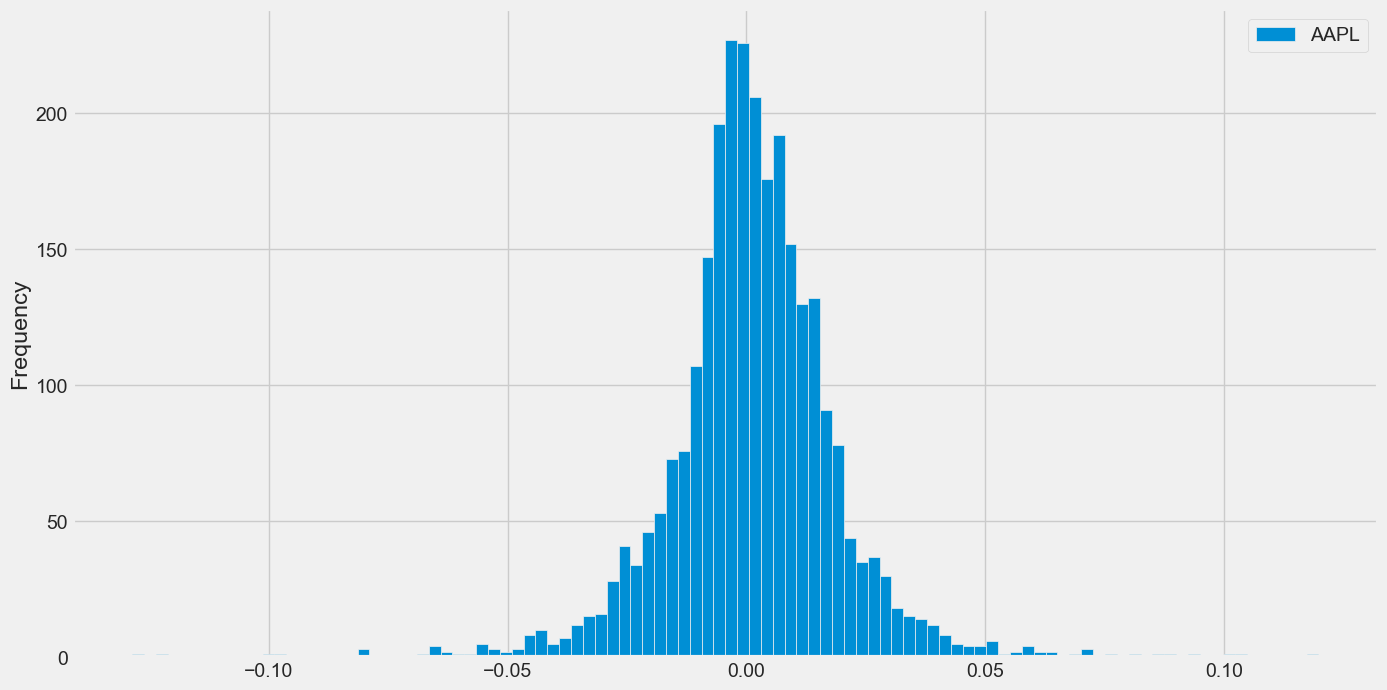

In [55]:
ret.plot(kind = 'hist', figsize = (15,8), bins = 100)

In [56]:
daily_mean_return = ret.mean()
daily_mean_return

AAPL    0.001191
dtype: float64

In [57]:
daily_var_return = ret.var()
daily_var_return

AAPL    0.000318
dtype: float64

In [58]:
daily_std_return = ret.std()
daily_std_return

AAPL    0.017843
dtype: float64

In [59]:
annual_mean_return = daily_mean_return * 252
annual_mean_return # 30 percent

AAPL    0.300134
dtype: float64

In [60]:
annual_var_return = daily_var_return * 252
annual_var_return

AAPL    0.080226
dtype: float64

In [61]:
annual_std_return = np.sqrt(annual_var_return)
# annual_std_return = daily_var_return * np.sqrt(252)

annual_std_return

AAPL    0.283242
dtype: float64

In [62]:
ticker = ["SPY", "AAPL", "KO", "IBM", "DIS", "MSFT"]

In [63]:
stocks = yf.download(ticker, start = "2010-01-01", end = "2021-01-01")

[*********************100%***********************]  6 of 6 completed


In [64]:
close = stocks.loc[:,"Close"].copy()

In [65]:
normclose = close.div(close.iloc[0]).mul(100)

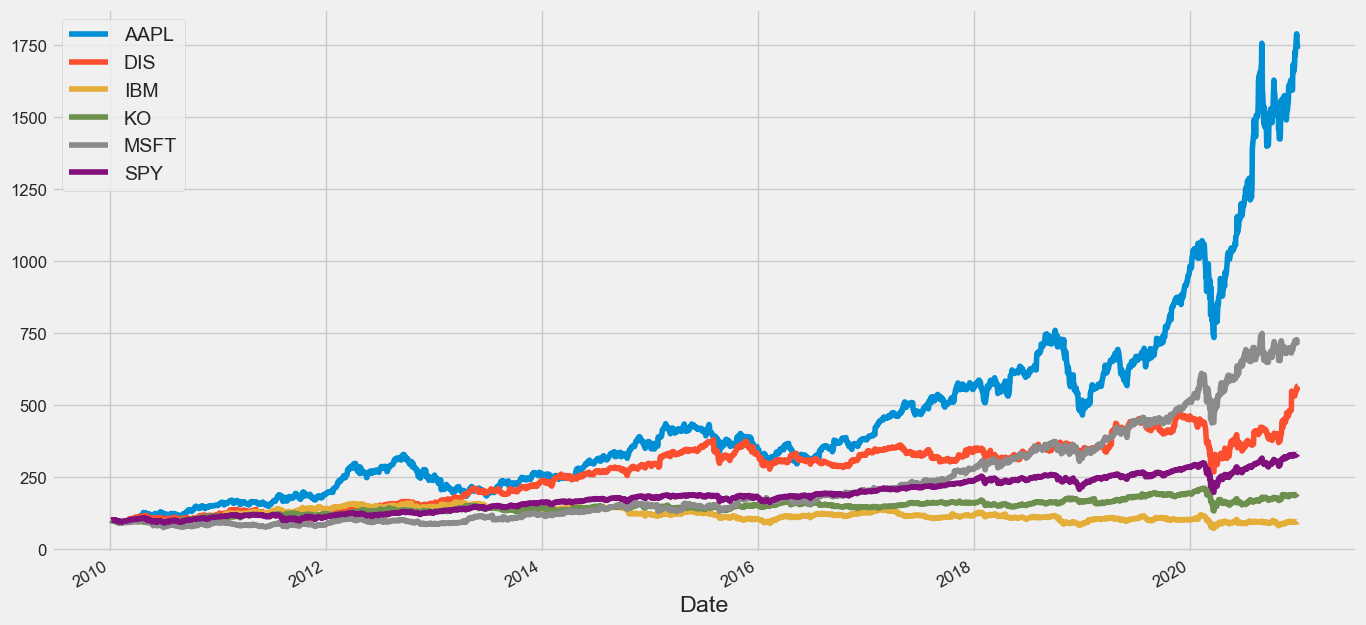

In [66]:
normclose.plot(figsize=(15,8), fontsize = 12)
plt.legend()
plt.show()

In [67]:
ret = close.pct_change().dropna()
ret

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05 00:00:00+00:00,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06 00:00:00+00:00,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07 00:00:00+00:00,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08 00:00:00+00:00,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11 00:00:00+00:00,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,0.007712,0.001037,0.006376,0.006782,0.007827,0.003890
2020-12-28 00:00:00+00:00,0.035766,0.029529,0.001043,0.013473,0.009921,0.008591
2020-12-29 00:00:00+00:00,-0.013315,-0.008722,-0.008172,-0.000554,-0.003601,-0.001908


In [68]:
ret.describe().T
# transpose of ret.describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
DIS,2768.0,0.000749,0.015717,-0.129846,-0.006210,0.000629,0.007901,0.144123
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [69]:
summary = ret.describe().T.loc[:,["mean", "std"]]
summary

,mean,std
Ticker,,
AAPL,0.001191,0.017843
DIS,0.000749,0.015717
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [70]:
summary["mean"] = summary["mean"] * 252
summary["std"] = summary["std"] * np.sqrt(252)
summary

,mean,std
Ticker,,
AAPL,0.300134,0.283242
DIS,0.188696,0.249504
IBM,0.020648,0.224345
KO,0.075091,0.176009
MSFT,0.211915,0.254185
SPY,0.123754,0.173170


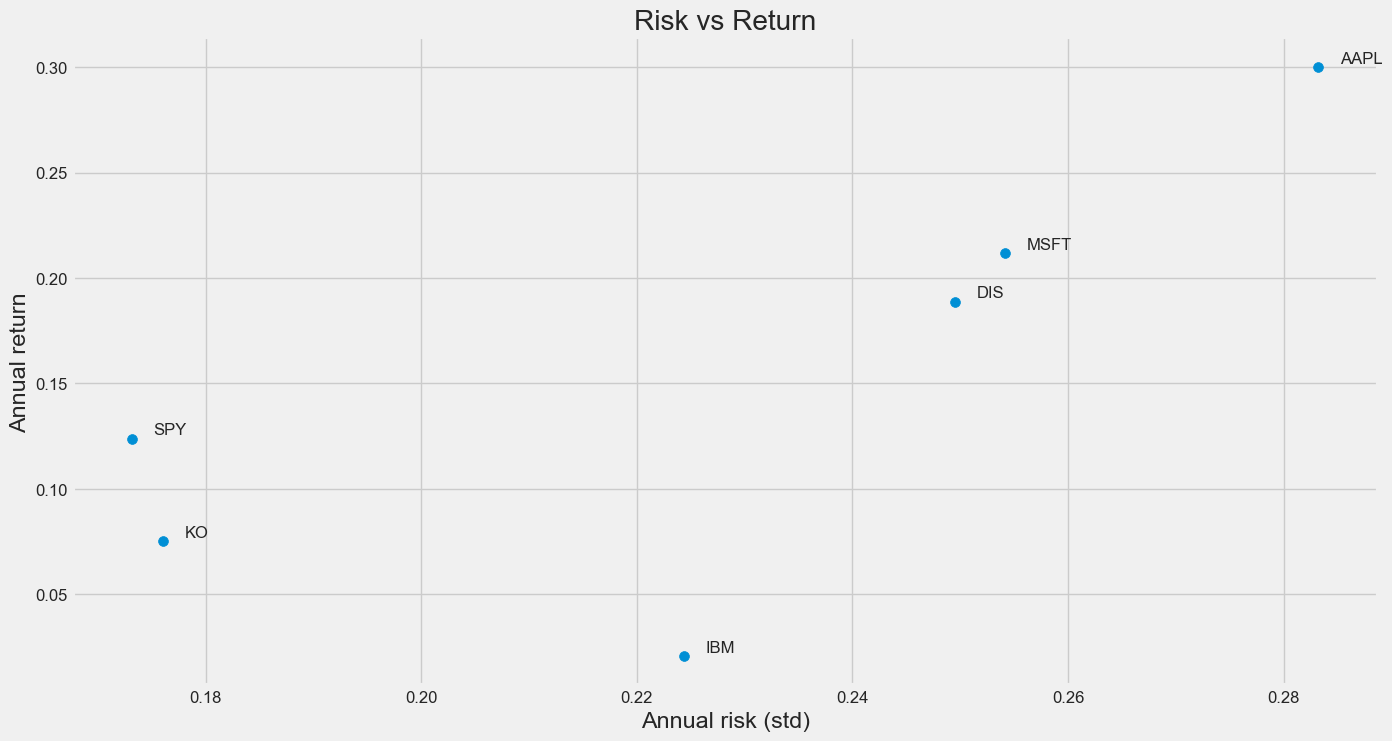

In [71]:
summary.plot.scatter(x = "std", y = "mean", figsize = (15,8), s = 50, fontsize = 12)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i,"std"] + 0.002, summary.loc[i,"mean"] + 0.002), fontsize = 12)
plt.xlabel("Annual risk (std)")
plt.ylabel("Annual return")
plt.title("Risk vs Return")
plt.show()

### Correlation and Covariance

In [72]:
ret

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05 00:00:00+00:00,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06 00:00:00+00:00,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07 00:00:00+00:00,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08 00:00:00+00:00,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11 00:00:00+00:00,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,0.007712,0.001037,0.006376,0.006782,0.007827,0.003890
2020-12-28 00:00:00+00:00,0.035766,0.029529,0.001043,0.013473,0.009921,0.008591
2020-12-29 00:00:00+00:00,-0.013315,-0.008722,-0.008172,-0.000554,-0.003601,-0.001908


In [73]:
ret.cov()

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Ticker,,,,,,
AAPL,0.000318,0.000115,0.000110,0.000067,0.000158,0.000128
DIS,0.000115,0.000247,0.000111,0.000085,0.000121,0.000121
IBM,0.000110,0.000111,0.000200,0.000079,0.000121,0.000108
KO,0.000067,0.000085,0.000079,0.000123,0.000076,0.000077
MSFT,0.000158,0.000121,0.000121,0.000076,0.000256,0.000130
SPY,0.000128,0.000121,0.000108,0.000077,0.000130,0.000119


In [74]:
ret.corr()

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Ticker,,,,,,
AAPL,1.000000,0.408513,0.436100,0.339213,0.554051,0.659557
DIS,0.408513,1.000000,0.497775,0.486514,0.480457,0.706726
IBM,0.436100,0.497775,1.000000,0.502436,0.533130,0.703342
KO,0.339213,0.486514,0.502436,1.000000,0.429749,0.639324
MSFT,0.554051,0.480457,0.533130,0.429749,1.000000,0.744601
SPY,0.659557,0.706726,0.703342,0.639324,0.744601,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

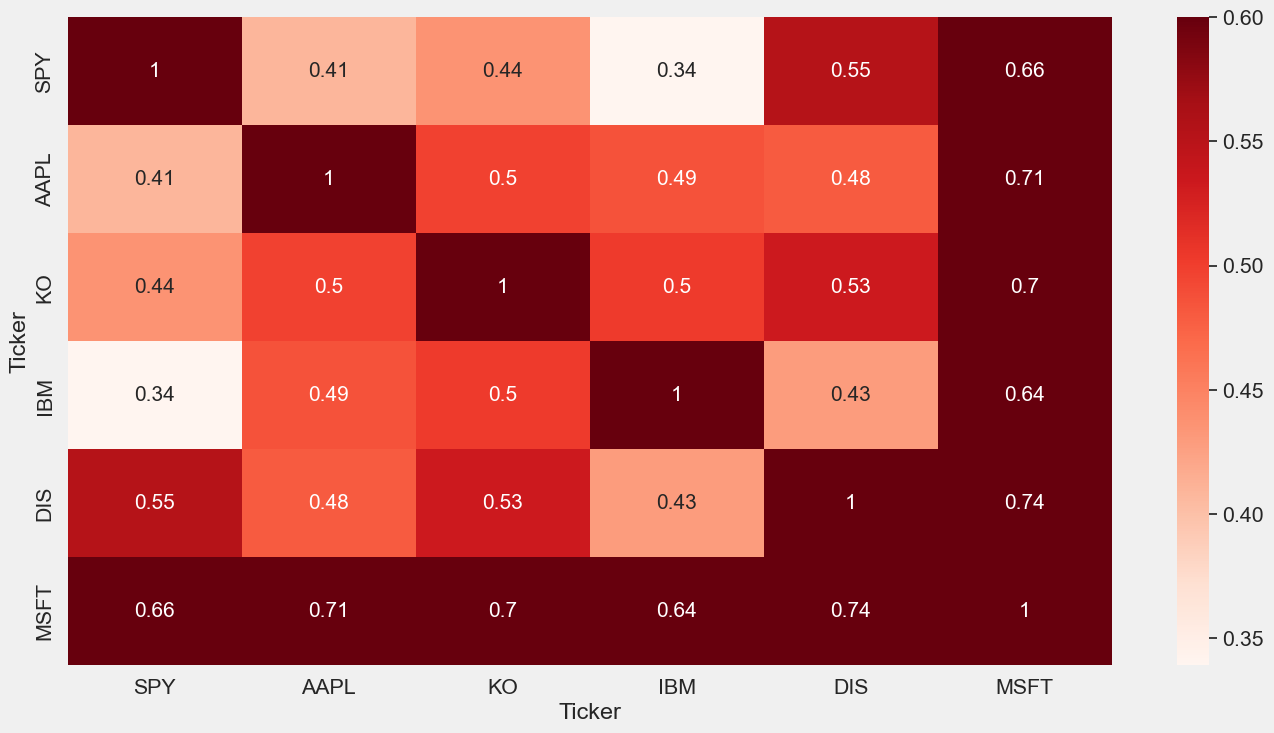

In [75]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size": 15}, vmax = 0.6, xticklabels = ticker, yticklabels = ticker)

In [77]:
close

Ticker,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-04 00:00:00+00:00,7.643214,32.070000,126.625237,28.520000,30.950001,113.330002
2010-01-05 00:00:00+00:00,7.656429,31.990000,125.095604,28.174999,30.959999,113.629997
2010-01-06 00:00:00+00:00,7.534643,31.820000,124.282982,28.165001,30.770000,113.709999
2010-01-07 00:00:00+00:00,7.520714,31.830000,123.852776,28.094999,30.450001,114.190002
2010-01-08 00:00:00+00:00,7.570714,31.879999,125.095604,27.575001,30.660000,114.570000
...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,173.729996,119.206497,53.439999,222.750000,369.000000
2020-12-28 00:00:00+00:00,136.690002,178.860001,119.330788,54.160000,224.960007,372.170013
2020-12-29 00:00:00+00:00,134.869995,177.300003,118.355644,54.130001,224.149994,371.459991


### Trading Strategy - Moving Averages Crossover
A moving average crossover compares a stock’s short-term average price (e.g., 20 days) with its long-term average price (e.g., 50 days) to identify trends:
- **Buy**: When the short-term average rises above the long-term average (uptrend).
- **Sell**: When the short-term average falls below the long-term average (downtrend).

 We work with a single stock (AAPL - Apple) for simplicity 

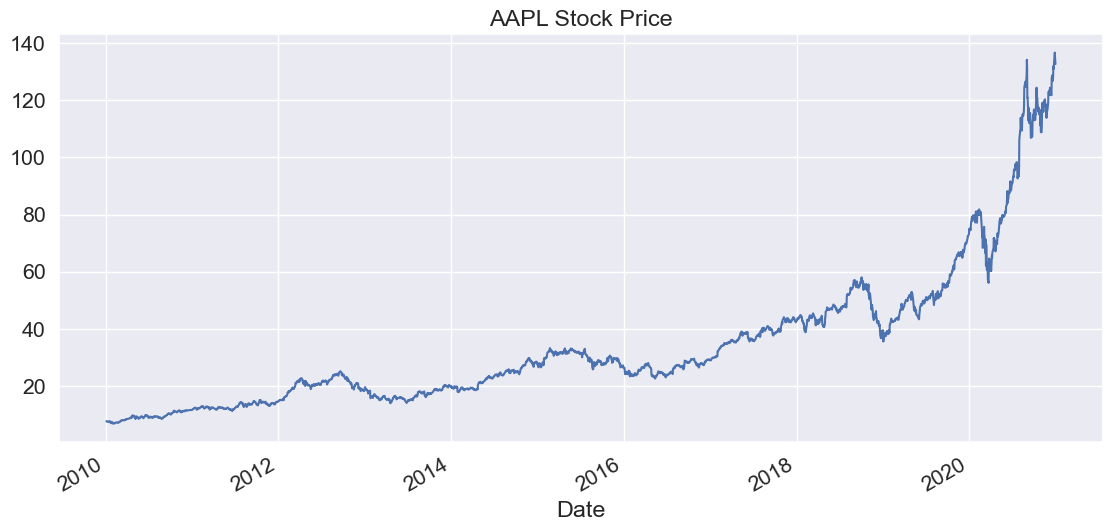

In [85]:
# Plotting historical closing price
close['AAPL'].plot(figsize=(12, 6), title="AAPL Stock Price")
plt.show()

In [90]:
# Calculating the short-term and long-term moving averages
aapl['short_ma'] = aapl['AAPL'].rolling(window=20).mean()  # Average price over 20 days
aapl['long_ma'] = aapl['AAPL'].rolling(window=50).mean()  # Average price over 50 days

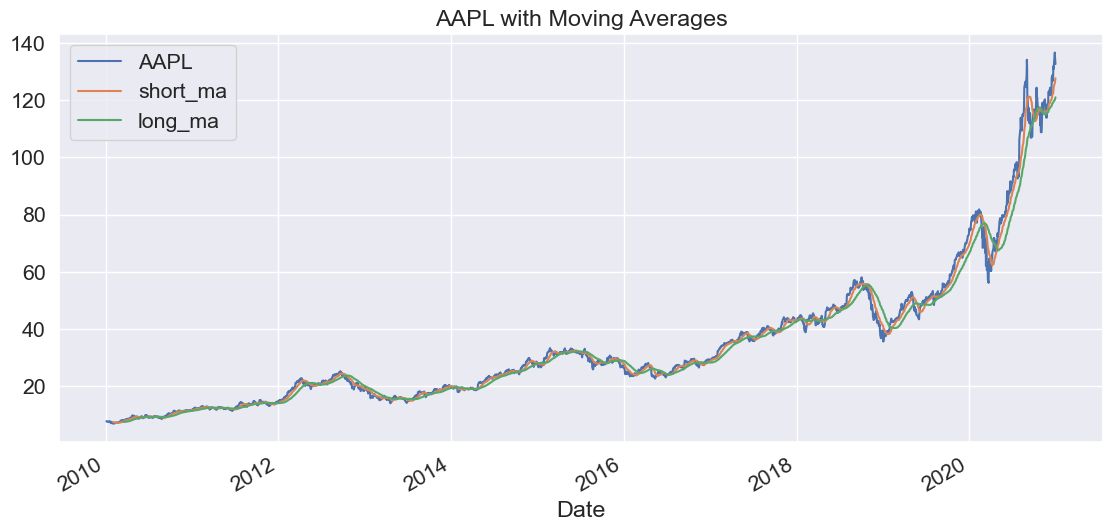

In [91]:
aapl[['AAPL', 'short_ma', 'long_ma']].plot(figsize=(12, 6), title="AAPL with Moving Averages")
plt.show()

In [93]:
aapl

,AAPL,short_ma,long_ma
Date,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN
2010-01-05 00:00:00+00:00,7.656429,NaN,NaN
2010-01-06 00:00:00+00:00,7.534643,NaN,NaN
2010-01-07 00:00:00+00:00,7.520714,NaN,NaN
2010-01-08 00:00:00+00:00,7.570714,NaN,NaN
...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,124.903000,119.7370
2020-12-28 00:00:00+00:00,136.690002,125.908001,120.0566
2020-12-29 00:00:00+00:00,134.869995,126.699000,120.3736


In [94]:
aapl['signal'] = 0
aapl.loc[aapl['short_ma'] > aapl['long_ma'], 'signal'] = 1  # Buy
aapl.loc[aapl['short_ma'] <= aapl['long_ma'], 'signal'] = -1  # Sell

In [95]:
aapl

,AAPL,short_ma,long_ma,signal
Date,,,,
2010-01-04 00:00:00+00:00,7.643214,NaN,NaN,0
2010-01-05 00:00:00+00:00,7.656429,NaN,NaN,0
2010-01-06 00:00:00+00:00,7.534643,NaN,NaN,0
2010-01-07 00:00:00+00:00,7.520714,NaN,NaN,0
2010-01-08 00:00:00+00:00,7.570714,NaN,NaN,0
...,...,...,...,...
2020-12-24 00:00:00+00:00,131.970001,124.903000,119.7370,1
2020-12-28 00:00:00+00:00,136.690002,125.908001,120.0566,1
2020-12-29 00:00:00+00:00,134.869995,126.699000,120.3736,1


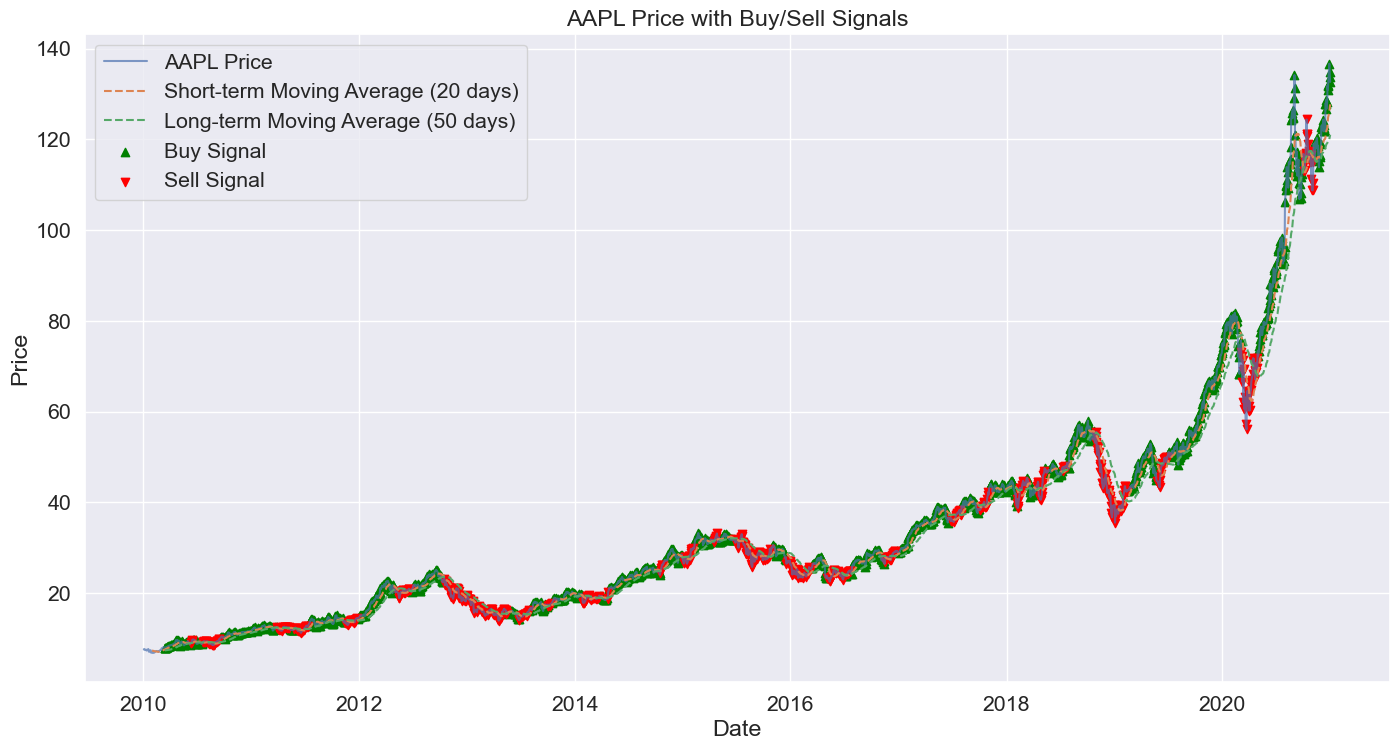

In [97]:
# Plot the stock price and moving averages
plt.figure(figsize=(15, 8))
plt.plot(aapl.index, aapl['AAPL'], label='AAPL Price', alpha=0.7)
plt.plot(aapl.index, aapl['short_ma'], label='Short-term Moving Average (20 days)', linestyle='--')
plt.plot(aapl.index, aapl['long_ma'], label='Long-term Moving Average (50 days)', linestyle='--')


plt.scatter(aapl.loc[aapl['signal'] == 1].index,
            aapl.loc[aapl['signal'] == 1, 'AAPL'],
            label='Buy Signal', marker='^', color='green', alpha=1)

plt.scatter(aapl.loc[aapl['signal'] == -1].index, 
            aapl.loc[aapl['signal'] == -1, 'AAPL'], 
            label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('AAPL Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

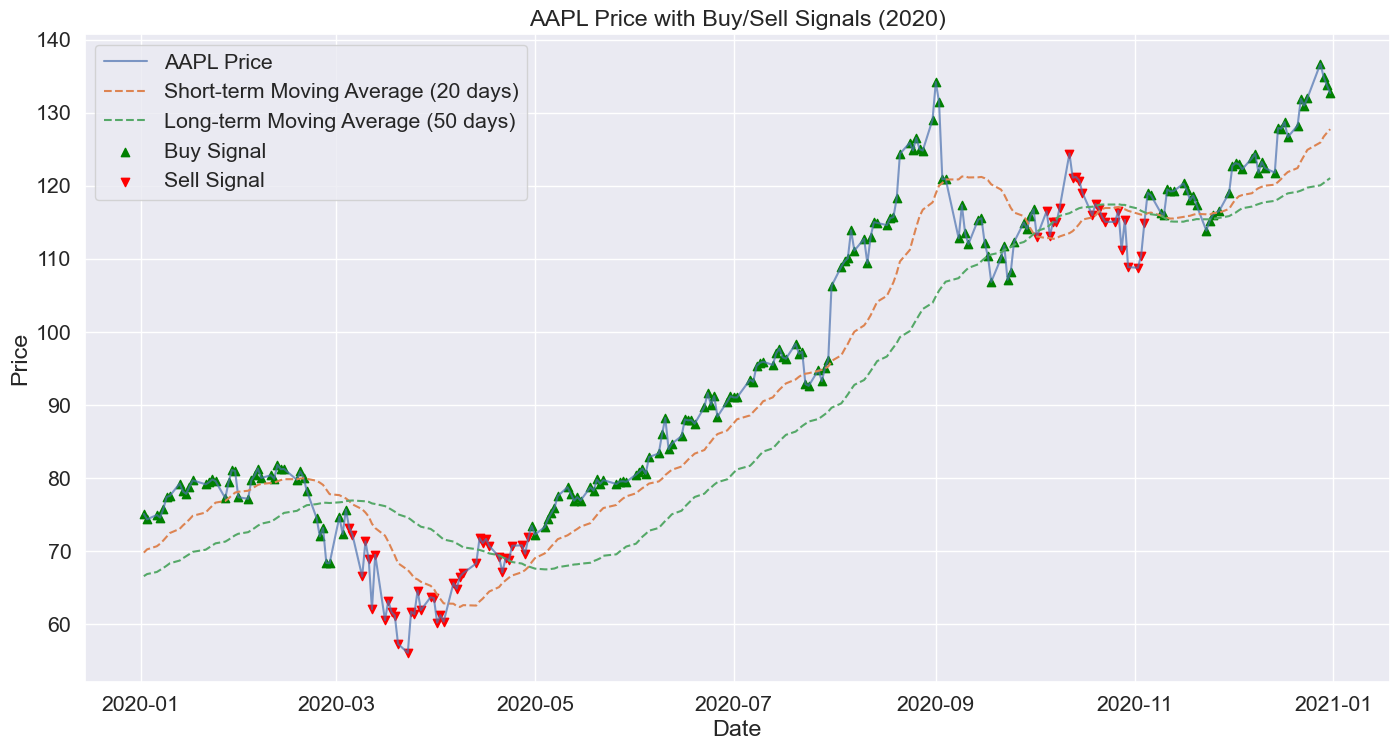

In [98]:
# Filtering data for the year 2020
aapl_2020 = aapl[(aapl.index >= "2020-01-01") & (aapl.index <= "2020-12-31")]

# Plotting the filtered data
plt.figure(figsize=(15, 8))
plt.plot(aapl_2020.index, aapl_2020['AAPL'], label='AAPL Price', alpha=0.7)
plt.plot(aapl_2020.index, aapl_2020['short_ma'], label='Short-term Moving Average (20 days)', linestyle='--')
plt.plot(aapl_2020.index, aapl_2020['long_ma'], label='Long-term Moving Average (50 days)', linestyle='--')

plt.scatter(aapl_2020.loc[aapl_2020['signal'] == 1].index,
            aapl_2020.loc[aapl_2020['signal'] == 1, 'AAPL'],
            label='Buy Signal', marker='^', color='green', alpha=1)

plt.scatter(aapl_2020.loc[aapl_2020['signal'] == -1].index,
            aapl_2020.loc[aapl_2020['signal'] == -1, 'AAPL'],
            label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('AAPL Price with Buy/Sell Signals (2020)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Backtesting 

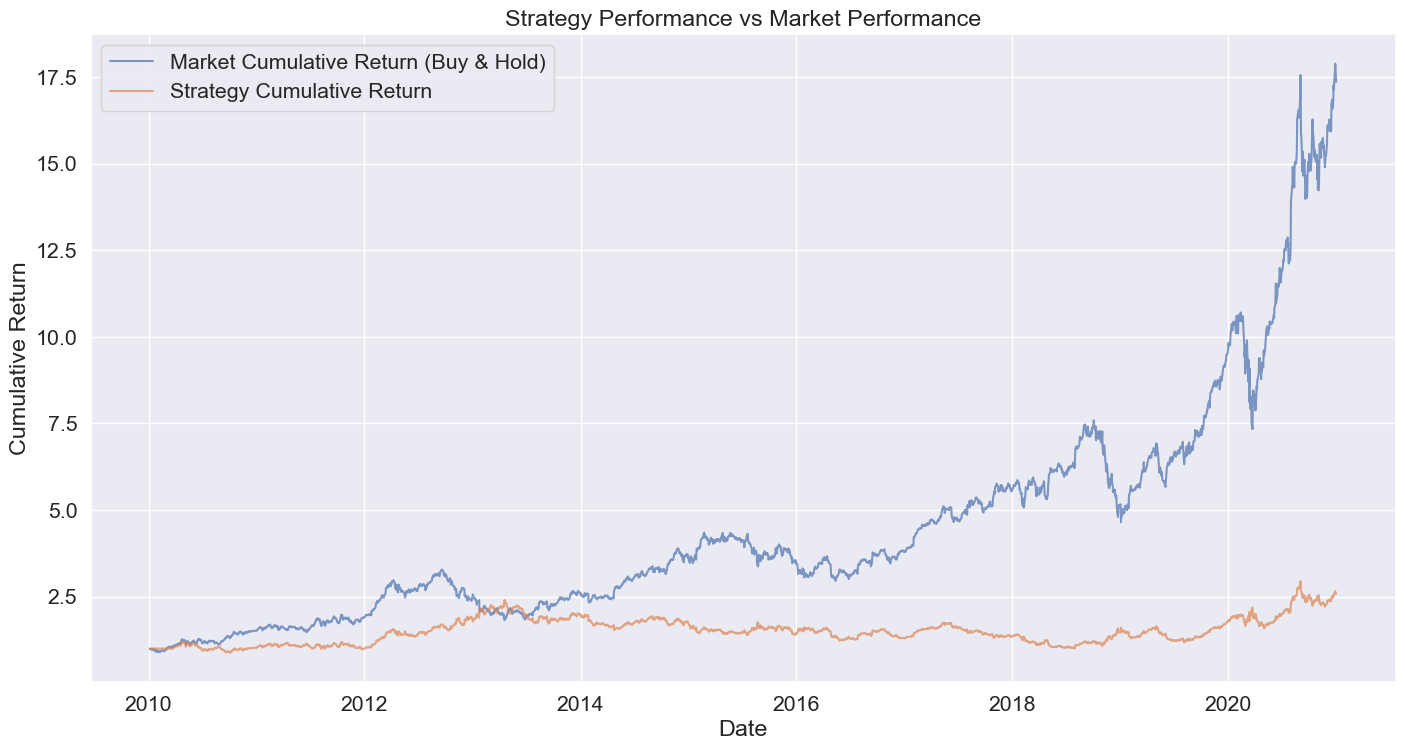

In [99]:
# Calculate Daily Returns
aapl['daily_return'] = aapl['AAPL'].pct_change()

# Calculate Strategy Returns
aapl['strategy_return'] = aapl['signal'].shift(1) * aapl['daily_return']

# Calculate Cumulative Returns
aapl['cumulative_market'] = (1 + aapl['daily_return']).cumprod()
aapl['cumulative_strategy'] = (1 + aapl['strategy_return']).cumprod()

# Plot Cumulative Returns
plt.figure(figsize=(15, 8))
plt.plot(aapl.index, aapl['cumulative_market'], label='Market Cumulative Return (Buy & Hold)', alpha=0.7)
plt.plot(aapl.index, aapl['cumulative_strategy'], label='Strategy Cumulative Return', alpha=0.7)
plt.title('Strategy Performance vs Market Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

####  - According to this plot, if we simply held AAPL stock (Buy & Hold), our investment would have grown significantly over time, especially during the post-2015 rally.
#### - Our strategy is not capturing the same upside. This indicates that the Moving Average Crossover might not be an effective strategy for this stock during this time period.

####